# Popular Video Games 🎮🕹️
#### Kaggle dataset link -- https://www.kaggle.com/datasets/matheusfonsecachaves/popular-video-games

# Importing the Required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\Data Science\\Datasets\\EDA\\03_popular_video_games\\backloggd_games.csv')

# Getting basic informations

In [3]:
df.head(2)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K


In [4]:
df.columns

Index(['Unnamed: 0', 'Title', 'Release_Date', 'Developers', 'Summary',
       'Platforms', 'Genres', 'Rating', 'Plays', 'Playing', 'Backlogs',
       'Wishlist', 'Lists', 'Reviews'],
      dtype='object')

# Data Cleaning

In [5]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)

In [6]:
df.columns= [x.lower() for x in df.columns]
df.head(2)

,id,title,release_date,developers,summary,platforms,genres,rating,plays,playing,backlogs,wishlist,lists,reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,60000.0,29999.500000,17320.652413,0.0,14999.75,29999.5,44999.25,59999.0
rating,25405.0,3.033171,0.735573,0.3,2.60,3.1,3.50,5.0


In [8]:
df.isnull().sum()

id                  0
title               0
release_date        0
developers          0
summary          4954
platforms           0
genres              0
rating          34595
plays               0
playing             0
backlogs            0
wishlist            0
lists               0
reviews             0
dtype: int64

In [9]:
df.isnull().mean()*100

## 57% of the values are missing for us

id               0.000000
title            0.000000
release_date     0.000000
developers       0.000000
summary          8.256667
platforms        0.000000
genres           0.000000
rating          57.658333
plays            0.000000
playing          0.000000
backlogs         0.000000
wishlist         0.000000
lists            0.000000
reviews          0.000000
dtype: float64

In [10]:
df.columns

Index(['id', 'title', 'release_date', 'developers', 'summary', 'platforms',
       'genres', 'rating', 'plays', 'playing', 'backlogs', 'wishlist', 'lists',
       'reviews'],
      dtype='object')

In [11]:
for i in df.columns:
    print(df[i].value_counts(),'-'*15,'\n')

id
0        1
40004    1
39992    1
39993    1
39994    1
        ..
20004    1
20005    1
20006    1
20007    1
59999    1
Name: count, Length: 60000, dtype: int64 --------------- 

title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64 --------------- 

release_date
TBD             8019
Dec 31, 2023     355
Dec 31, 1995     219
Dec 31, 1994     200
Dec 31, 1983     

In [12]:
df.shape

(60000, 14)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.dropna(how='all', inplace=True)

In [15]:
df['rating'].isnull().sum()

34595

In [16]:
(df[['genres']] == '[]').value_counts()

genres
False     53259
True       6741
Name: count, dtype: int64

In [17]:
df['genres'] = df['genres'].str.replace(r'[[]]', 'Others', regex=True)

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\pandas\core\strings\object_array.py:170: FutureWarning: Possible nested set at position 1
  pat = re.compile(pat, flags=flags)


In [18]:
df['genres'] = df['genres'].str.replace(r"[\[\]']", '', regex=True)

In [19]:
df['platforms'] = df['platforms'].str.replace(r'[[]]', 'Others', regex=True)

In [20]:
df['platforms'] = df['platforms'].str.replace(r"[\[\]']", '', regex=True)

In [21]:
df['developers'] = df['developers'].str.replace(r'[[]]', 'Others', regex=True)

In [22]:
df['developers'] = df['developers'].str.replace(r"[\[\]']", '', regex=True)

In [23]:
def convert_str_to_number(s):
    if 'K' in s:
        num = float(s.replace('K', '')) * 1000
    else:
        num = float(s)
    return int(num)

df['plays'] = df['plays'].apply(convert_str_to_number)
df['playing'] = df['playing'].apply(convert_str_to_number)
df['backlogs'] = df['backlogs'].apply(convert_str_to_number)
df['lists'] = df['lists'].apply(convert_str_to_number)
df['wishlist'] = df['wishlist'].apply(convert_str_to_number)
df['reviews'] = df['reviews'].apply(convert_str_to_number)

In [24]:
df.head()

,id,title,release_date,developers,summary,platforms,genres,rating,plays,playing,backlogs,wishlist,lists,reviews
0,0,Elden Ring,"Feb 25, 2022","FromSoftware, Bandai Namco Entertainment","Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlayStati...","Adventure, RPG",4.5,21000,4100,5600,5500,4600,3000
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","Nintendo, Nintendo EPD Production Group No. 3",The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000,3100,5600,3000,5100,3000
2,2,Hades,"Dec 07, 2018",Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, Play...","Adventure, Brawler, Indie, RPG",4.3,25000,3500,7300,4000,3200,2100
3,3,Hollow Knight,"Feb 24, 2017",Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000,2700,9600,2600,3400,2100
4,4,Undertale,"Sep 15, 2015","tobyfox, 8-4","A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbox On...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000,728,5700,2100,3900,2500


In [25]:
for i in df.columns:
    print(df[i].value_counts(),'-'*15,'\n')

id
0        1
40004    1
39992    1
39993    1
39994    1
        ..
20004    1
20005    1
20006    1
20007    1
59999    1
Name: count, Length: 60000, dtype: int64 --------------- 

title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64 --------------- 

release_date
TBD             8019
Dec 31, 2023     355
Dec 31, 1995     219
Dec 31, 1994     200
Dec 31, 1983     

In [26]:
df.drop(df.loc[df['release_date']=='TBD'].index, inplace=True)

In [27]:
df.shape

(51981, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51981 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            51981 non-null  int64  
 1   title         51981 non-null  object 
 2   release_date  51981 non-null  object 
 3   developers    51981 non-null  object 
 4   summary       49499 non-null  object 
 5   platforms     51981 non-null  object 
 6   genres        51981 non-null  object 
 7   rating        24859 non-null  float64
 8   plays         51981 non-null  int64  
 9   playing       51981 non-null  int64  
 10  backlogs      51981 non-null  int64  
 11  wishlist      51981 non-null  int64  
 12  lists         51981 non-null  int64  
 13  reviews       51981 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 5.9+ MB


In [29]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [30]:
df['release_date'].min(),df['release_date'].max()

(Timestamp('1952-08-31 00:00:00'), Timestamp('2029-12-01 00:00:00'))

In [31]:
rate_median = df['rating'].median()

In [32]:
rate_median

3.1

In [33]:
df['rating'].fillna(rate_median, inplace=True)

In [34]:
df['rating'].isnull().value_counts()

rating
False    51981
Name: count, dtype: int64

In [35]:
df.describe().T
##there is not much change after filling it with median value

,count,mean,min,25%,50%,75%,max,std
id,51981.0,29185.26679,0.0,13863.0,28907.0,44314.0,59999.0,17454.830074
release_date,51981,2011-03-30 09:35:04.484330752,1952-08-31 00:00:00,2004-08-27 00:00:00,2014-12-31 00:00:00,2019-08-31 00:00:00,2029-12-01 00:00:00,NaN
rating,51981.0,3.067584,0.3,3.1,3.1,3.1,5.0,0.506911
plays,51981.0,236.998384,-1.0,1.0,4.0,32.0,38000.0,1276.631508
playing,51981.0,7.259883,-1.0,0.0,0.0,1.0,4600.0,65.609553
backlogs,51981.0,62.319463,-1.0,0.0,2.0,13.0,9600.0,306.165145
wishlist,51981.0,31.665916,0.0,0.0,1.0,7.0,5500.0,163.647017
lists,51981.0,34.011966,0.0,0.0,2.0,11.0,5100.0,150.475201
reviews,51981.0,13.612012,0.0,0.0,0.0,2.0,3000.0,77.648443


# Analysing the data

In [36]:
df.head(2)

,id,title,release_date,developers,summary,platforms,genres,rating,plays,playing,backlogs,wishlist,lists,reviews
0,0,Elden Ring,2022-02-25,"FromSoftware, Bandai Namco Entertainment","Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlayStati...","Adventure, RPG",4.5,21000,4100,5600,5500,4600,3000
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000,3100,5600,3000,5100,3000


In [37]:
df['primary_genre'] = df['genres'].apply(lambda x: x.split(',')[0])

In [38]:
df['primary_genre'].value_counts()

primary_genre
Adventure              17645
Indie                   6196
Arcade                  4325
Others                  3591
Shooter                 2647
RPG                     2472
Simulator               2096
Platform                1885
Puzzle                  1700
Sport                   1538
Racing                  1436
Fighting                1281
Visual Novel             938
Strategy                 928
Brawler                  759
Real Time Strategy       635
Music                    632
Card & Board Game        607
Point-and-Click          229
Quiz/Trivia              194
Turn Based Strategy      101
Pinball                   98
MOBA                      27
Tactical                  21
Name: count, dtype: int64

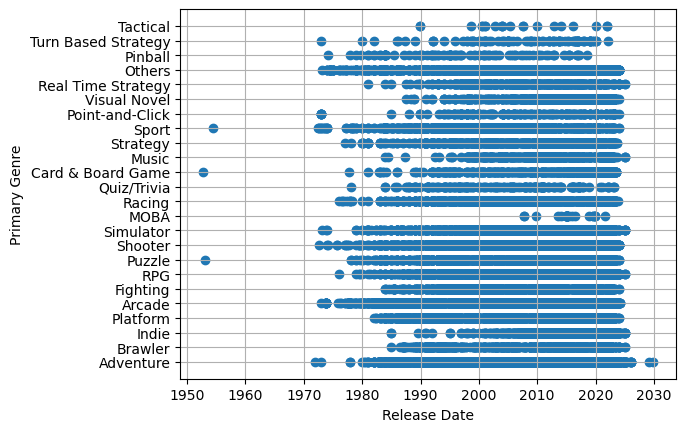

In [39]:
plt.scatter(df['release_date'], df['primary_genre'])
plt.xlabel('Release Date')
plt.ylabel('Primary Genre')
plt.grid()
plt.show()

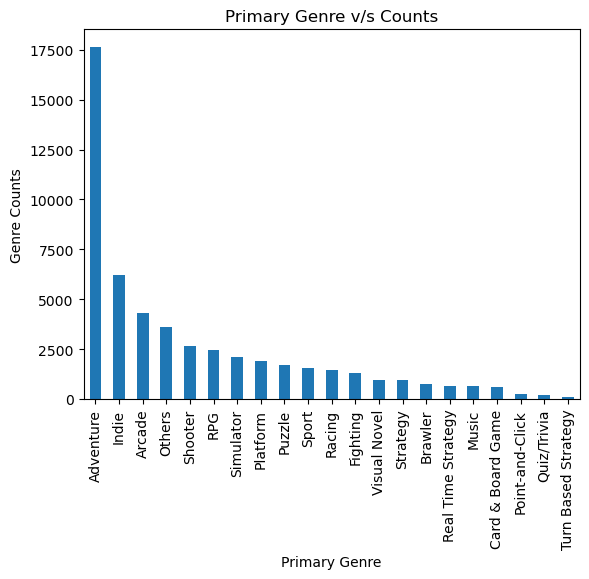

In [40]:
genre_count = df['primary_genre'].value_counts().iloc[0:21]
genre_count.plot(kind='bar')
plt.xlabel('Primary Genre')
plt.ylabel('Genre Counts')
plt.title('Primary Genre v/s Counts')
plt.show()

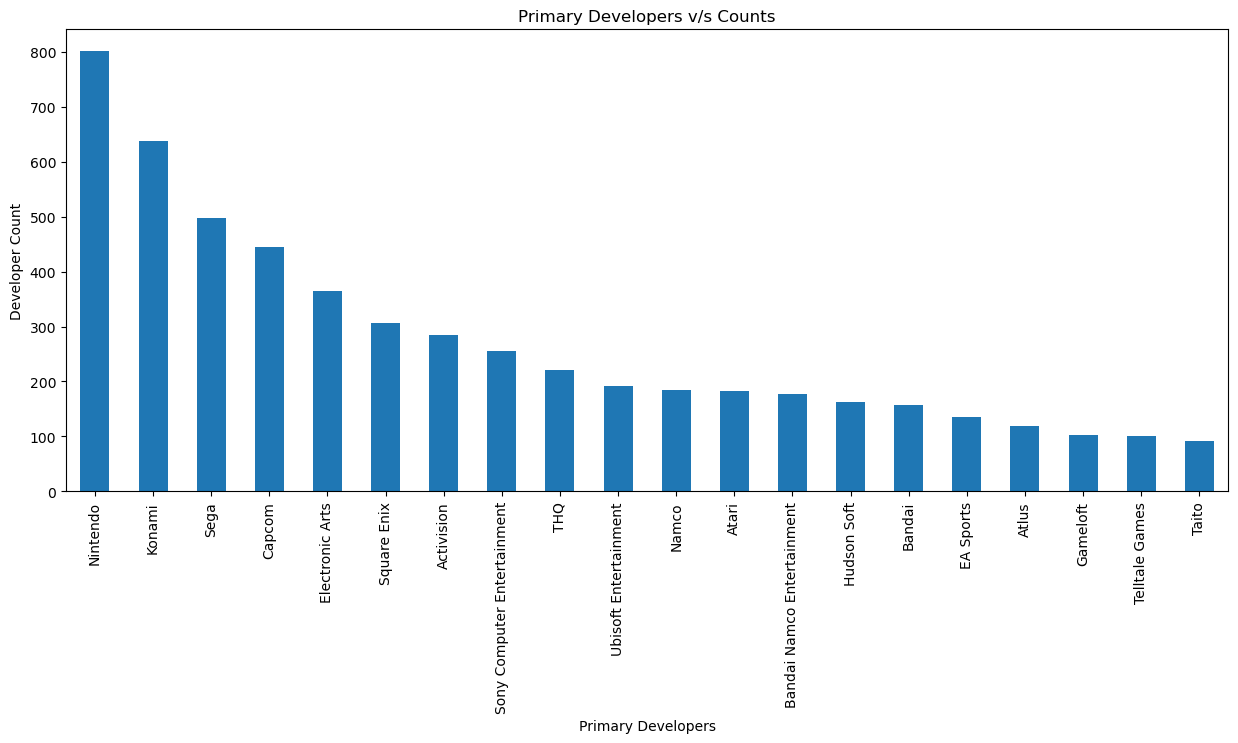

In [41]:
plt.figure(figsize=(15, 6))
df['primary_developers'] = df['developers'].apply(lambda x: x.split(',')[0])
developer_counts = df['primary_developers'].value_counts().iloc[1:21]
developer_counts.plot(kind='bar')
plt.xlabel('Primary Developers')
plt.ylabel('Developer Count')
plt.title('Primary Developers v/s Counts')
plt.show()

In [42]:
df['primary_platforms'] = df['platforms'].apply(lambda x: x.split(',')[0])

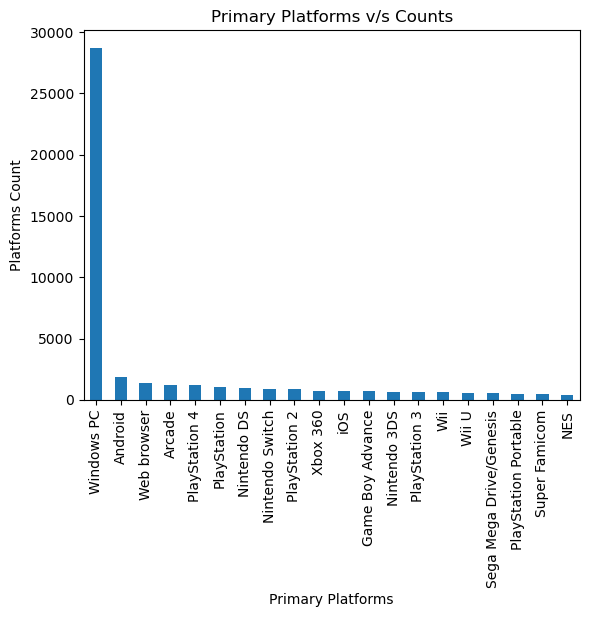

In [43]:
platform_counts = df['primary_platforms'].value_counts().iloc[:20]
platform_counts.plot(kind='bar')
plt.xlabel('Primary Platforms')
plt.ylabel('Platforms Count')
plt.title('Primary Platforms v/s Counts')

plt.show()

In [44]:
df.drop(columns=['developers','summary','platforms','genres'], inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51981 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  51981 non-null  int64         
 1   title               51981 non-null  object        
 2   release_date        51981 non-null  datetime64[ns]
 3   rating              51981 non-null  float64       
 4   plays               51981 non-null  int64         
 5   playing             51981 non-null  int64         
 6   backlogs            51981 non-null  int64         
 7   wishlist            51981 non-null  int64         
 8   lists               51981 non-null  int64         
 9   reviews             51981 non-null  int64         
 10  primary_genre       51981 non-null  object        
 11  primary_developers  51981 non-null  object        
 12  primary_platforms   51981 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(

In [46]:
df.head(2)

,id,title,release_date,rating,plays,playing,backlogs,wishlist,lists,reviews,primary_genre,primary_developers,primary_platforms
0,0,Elden Ring,2022-02-25,4.5,21000,4100,5600,5500,4600,3000,Adventure,FromSoftware,Windows PC
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,4.4,35000,3100,5600,3000,5100,3000,Adventure,Nintendo,Wii U


In [47]:
rating_df = df[['primary_genre','rating','plays','reviews']]
rating_df['rating'].sort_values()
mean_ratings = rating_df.groupby('primary_genre')['rating'].mean()
mean_plays = rating_df.groupby('primary_genre')['plays'].mean()
mean_reviews = rating_df.groupby('primary_genre')['reviews'].mean()
#print(mean_reviews)

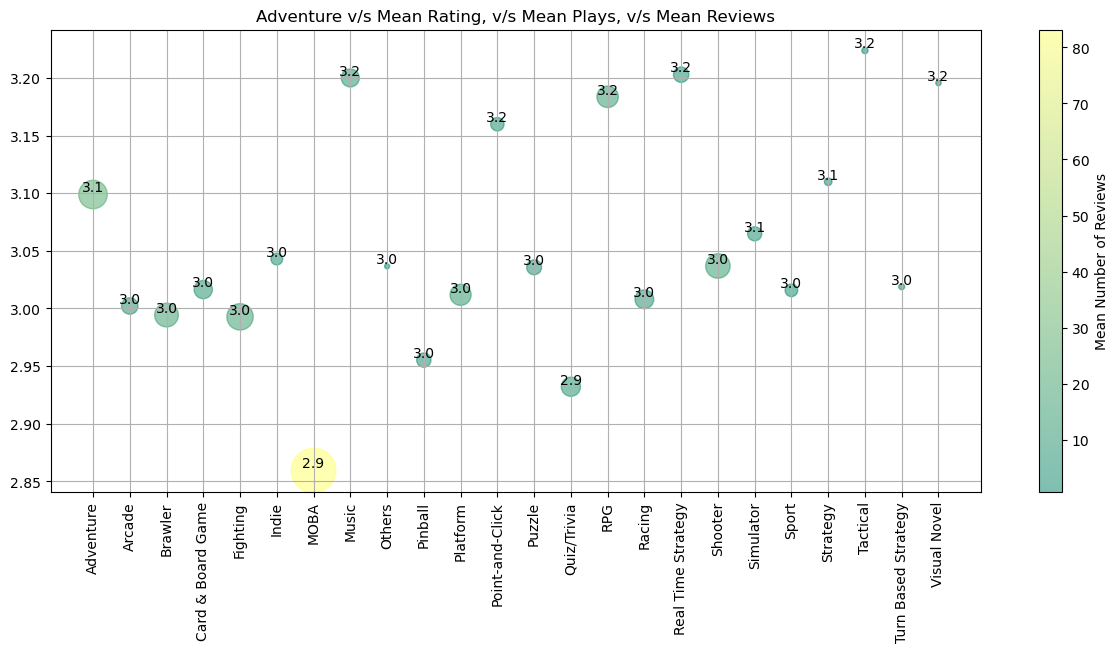

In [48]:
plt.figure(figsize=(15, 6))
plt.scatter(mean_ratings.index, mean_ratings.values, s=mean_plays.values, c=mean_reviews.values, cmap='summer', alpha=0.5)
plt.title('Adventure v/s Mean Rating, v/s Mean Plays, v/s Mean Reviews')
plt.xticks(rotation=90)
cbar = plt.colorbar()
cbar.set_label('Mean Number of Reviews')
for genre, mean_rating in mean_ratings.items(): 
    plt.text(genre, mean_rating, f'{mean_rating:.1f}', ha='center', va='bottom', mouseover=True)
plt.grid()
plt.show()